In [1]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#import data
data_titanic=pd.read_csv('train.csv')

In [3]:
#print first 5 rows of the data
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#print the dtype and non null count
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data_titanic.Embarked.isna().sum()

2

In [6]:
#print the dimensions of train and test data
from sklearn.model_selection import train_test_split
y_data=data_titanic.Survived
x_data=data_titanic.drop('Survived',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.15,random_state=1)
print('number of taining samples',x_train.shape[0])
print('number of test samples',x_test.shape[0])
print(data_titanic.shape[0])

number of taining samples 757
number of test samples 134
891


In [7]:
#run statistical summmary for numeric variables and report your findings for each variable
data_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#check the missing values for each variable
data_titanic.Age.isna().sum()

177

In [9]:
data_titanic.Embarked.isna().sum()

2

In [10]:
dum_survive=pd.get_dummies(data_titanic.Survived)
dum_class=pd.get_dummies(data_titanic.Pclass)
dum_survive

,0,1
0,1,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
886,1,0
887,0,1
888,1,0
889,0,1


## Data Vizualization using matplotlib and seaborn packages

In [11]:
#import vizualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

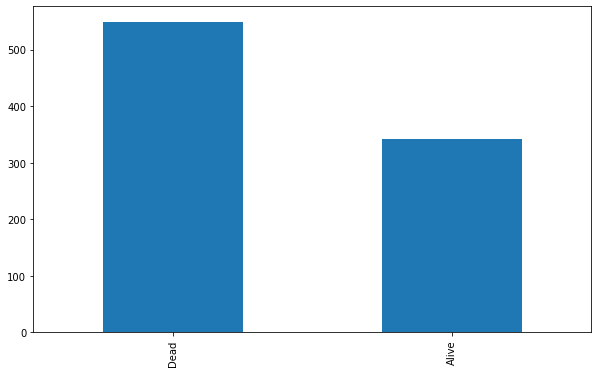

In [12]:
plt.figure(figsize=(10,6))
g=data_titanic['Survived'].value_counts().plot(kind='bar')
g.set_xticklabels(["Dead","Alive"])

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

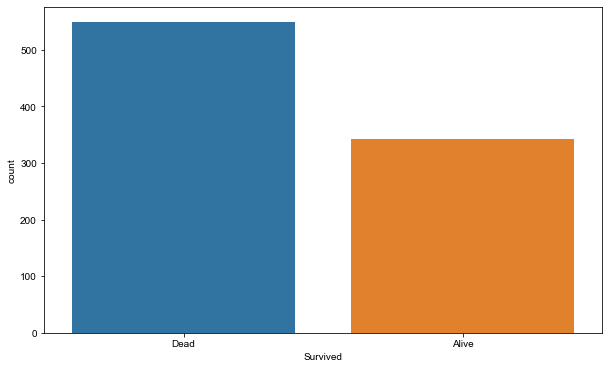

In [13]:
#create a function called bar_chart that can generate different bars for people who survived vs people who didnt survive 
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived',data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

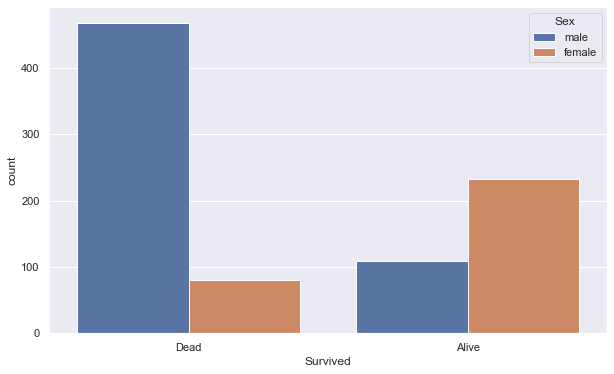

In [14]:
#use the function bar_chart for variable sex, sample output is given below
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived',hue="Sex",data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])


[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

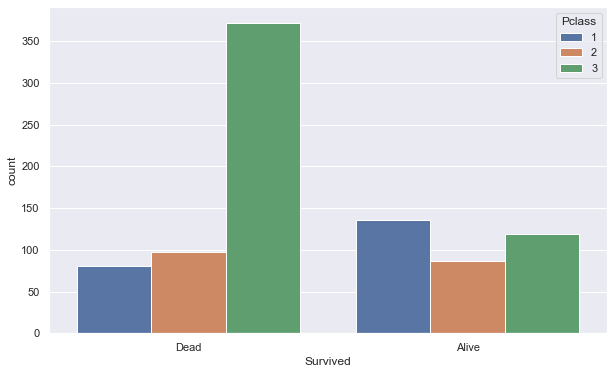

In [15]:
#use the function bar_chart for variable Pclass, sample output is given below
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived',hue="Pclass",dodge=True,data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

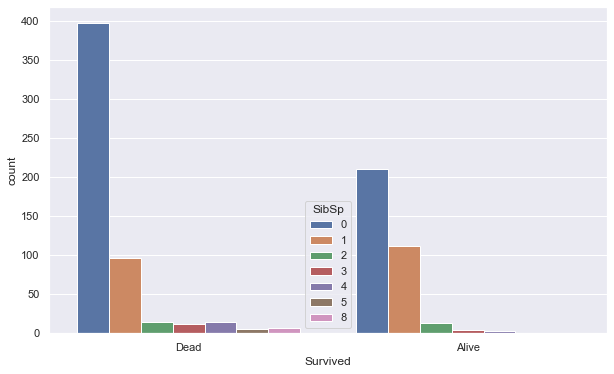

In [16]:
#use the function bar_chart for variable SibSp, sample output is given below
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived',hue="SibSp",dodge=True,data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

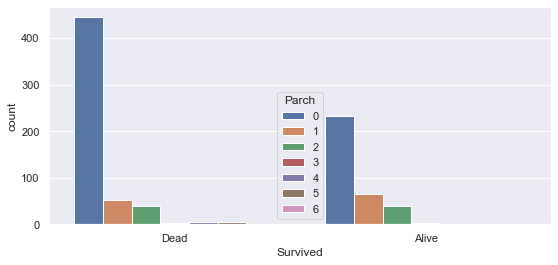

In [17]:
#use the function bar_chart for variable Parch, sample output is given below
plt.figure(figsize=(9,4))
g=sns.countplot(x='Survived',hue="Parch",dodge=True,data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

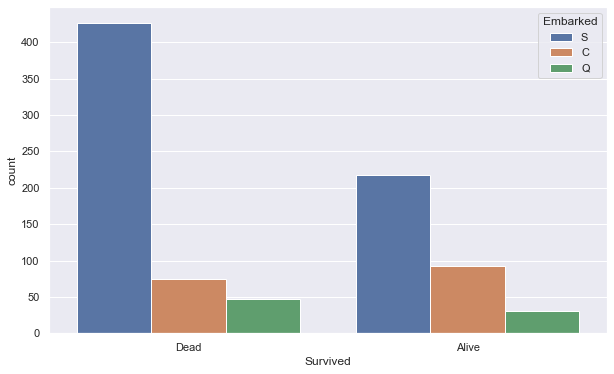

In [18]:
#use the function bar_chart for variable Embarked, sample output is given below
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived',hue="Embarked",dodge=True,data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

## Feature Engineering

In [19]:
#trick question
#use str.extract to extract the salutations from the Name feature and store them in a new vairable called Title
data_titanic['Title']=data_titanic['Name'].str.extract('([A-Za-z]+\.)')
data_titanic.Title

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [20]:
#print the frequency count of the new variable Title
data_titanic.Title.value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Sir.           1
Mme.           1
Capt.          1
Jonkheer.      1
Lady.          1
Don.           1
Ms.            1
Countess.      1
Name: Title, dtype: int64

In [21]:
#convert the Title into a numeric variable
#optional : use label encoder or any other encoding technqiue apart from dummy encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit_transform(data_titanic.Title)

array([12, 13,  9, 13, 12, 12, 12,  8, 13, 13,  9,  9, 12, 12,  9, 13,  8,
       12, 13, 13, 12, 12,  9, 12,  9, 13, 12, 12,  9, 12,  3, 13,  9, 12,
       12, 12, 12, 12,  9,  9, 13, 13, 12,  9,  9, 12, 12,  9, 12, 13,  8,
       12, 13, 13, 12, 12,  9, 12,  9,  8, 12,  9, 12,  8, 12,  8, 13, 12,
        9, 12, 12,  9, 12, 12, 12, 12, 12, 12,  8,  9, 12, 12,  9, 12,  9,
       13, 12, 12,  9, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 12,  9, 12,
       12, 12, 12, 12,  9, 12, 12,  9, 12,  9, 12,  9,  9, 12, 12, 12, 12,
        9, 12, 12, 12,  9, 12,  8, 12, 12,  9, 12, 12, 12, 13, 13, 12, 12,
        9, 12, 12, 12, 13,  9, 13, 12, 12, 12, 12,  9, 12, 15, 15, 13, 12,
       12, 12, 12,  9, 12, 12,  8, 12, 13, 12, 12,  8,  8, 13, 13, 12, 12,
       12,  8,  9, 12, 12, 12,  8,  9, 12, 12,  9, 12,  8,  8,  9, 12, 13,
       12, 12, 12, 13, 12,  9,  8, 13,  9, 12, 12,  9,  9, 12, 12, 12, 12,
       12,  9, 12, 12,  9, 12, 12,  9, 12, 12, 12,  9,  9, 12,  9, 12, 12,
       12, 12, 12, 12, 12

In [22]:
#drop the name feature as the same is not required
data_titanic.drop(columns='Name',inplace=True)
data_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [23]:
#encode sex using dummy encoding
dum_sex=pd.get_dummies(data_titanic.Sex)
dum_sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [24]:
#impute missing values for Age using your best judgement
data_titanic['Age'].replace(np.nan , data_titanic.Age.mean() , inplace = True)
data_titanic.Age.isna().sum()
data_titanic.Age.unique()
max(data_titanic.Age)

80.0

## Binning

In [25]:
#bin the age data using following bin distributions
#Age <= 16 bin as 0,
#Age > 16 & Age <= 26 bin as  1,
#Age > 26 & Age <= 36 bin as  2,
#Age > 36 & Age <= 62 bin as  3,
#Age > 62 bin as 4
data_titanic['Age_bin']=pd.cut(data_titanic['Age'], bins=[0,16,26,36,62,80],labels=[0,1,2,3,4])

In [26]:
#print the bin distribution
data_titanic['Age_bin'].value_counts()

2    377
1    219
3    180
0    100
4     15
Name: Age_bin, dtype: int64

[Text(0, 0, 'Dead'), Text(1, 0, 'Alive')]

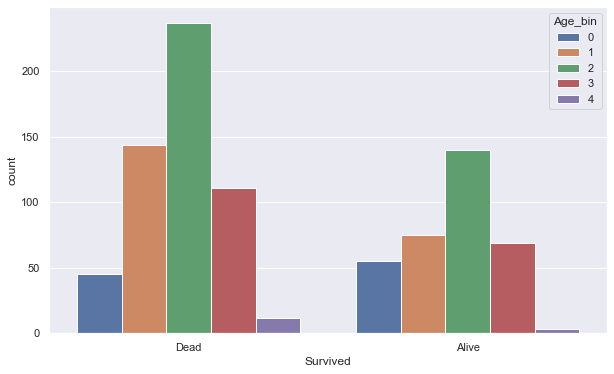

In [27]:
#use the bar_chart function to vizualized the new bins for age, sample output given below
plt.figure(figsize=(10,6))
g=sns.countplot(x='Survived', hue='Age_bin', data=data_titanic)
sns.set_theme(style='darkgrid')
g.set_xticklabels(["Dead","Alive"])

In [28]:
#replace missing values in Embarked with most frequent value in the dataset
data_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
data_titanic.Embarked.replace(np.nan,'S',inplace=True)
data_titanic.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [30]:
#dummify emabarked
dum_embarked=pd.get_dummies(data_titanic.Embarked)
dum_embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [31]:
#imput missing values in Fare using your best judgment
data_titanic.Fare.replace('0',data_titanic.Fare.mean(), inplace=True)

In [32]:
#trick question
#extract the alphabetical value from cabin variable which is an alphanumeric variable using str
#replace the missing values in new cabin variable which is alphabetical in nature using most frequent value
data_titanic['new_cabin']=data_titanic['Cabin'].str.extract('([A-Z])')
data_titanic.new_cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: new_cabin, dtype: int64

In [33]:
data_titanic.new_cabin.replace(np.nan,'C',inplace=True)
data_titanic.new_cabin.value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: new_cabin, dtype: int64

In [34]:
#dummify the cabin variable
dum_cabin=pd.get_dummies(data_titanic.new_cabin)
dum_cabin

,A,B,C,D,E,F,G,T
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,0,0,0
887,0,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0,0
889,0,0,1,0,0,0,0,0


In [35]:
#drop features Ticket, SibSp and Parch
data_titanic.drop(['Ticket','SibSp','Parch'], axis=1, inplace=True)
data_titanic

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Age_bin,new_cabin
0,1,0,3,male,22.000000,7.2500,NaN,S,Mr.,1,C
1,2,1,1,female,38.000000,71.2833,C85,C,Mrs.,3,C
2,3,1,3,female,26.000000,7.9250,NaN,S,Miss.,1,C
3,4,1,1,female,35.000000,53.1000,C123,S,Mrs.,2,C
4,5,0,3,male,35.000000,8.0500,NaN,S,Mr.,2,C
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,13.0000,NaN,S,Rev.,2,C
887,888,1,1,female,19.000000,30.0000,B42,S,Miss.,1,B
888,889,0,3,female,29.699118,23.4500,NaN,S,Miss.,2,C
889,890,1,1,male,26.000000,30.0000,C148,C,Mr.,1,C


## Modelling

In [36]:
#Build a logistic regression model on the training data using OLS and report findings
data_titanic1=data_titanic[['Age', 'Fare']]
y=data_titanic.Survived


In [37]:
X=pd.concat([data_titanic1,dum_class,dum_sex,dum_embarked],axis=1)

In [38]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     80.22
Date:                Mon, 15 Feb 2021   Prob (F-statistic):           4.95e-90
Time:                        20:35:50   Log-Likelihood:                -402.68
No. Observations:                 891   AIC:                             821.4
Df Residuals:                     883   BIC:                             859.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3203      0.020     16.340      0.000       0.282       0.359
Age           -0.0050      0.001     -4.683      0.000      -0.007      -0.003
Fare        2.177e-05      0.000      0.066      0.947      -0.001       0.001
1              0.2786      0.030      9.182      0.000       0.219       0.338
2              0.1224      0.024      5.197      0.000       0.076       0.169
3             -0.0806      0.018     -4.475      0.000      -0.116      -0.045
female         0.4049      0.017     24.073      0.000       0.372       0.438
male          -0.0845      0.017     -4.919      0.000      -0.118      -0.051
C              0.1347      0.027      5.036      0.000       0.082       0.187
Q              0.1334      0.035      3.810      0.000       0.065       0.202
S              0.0522      0.019      2.682      0.007       0.014       0.090
==============================================================================
Omnibus:                       37.641   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.454
Skew:                           0.525   Prob(JB):                     9.97e-10
Kurtosis:                       3.122   Cond. No.                     7.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.95e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.384   
Dependent Variable: Survived         AIC:                821.3565
Date:               2021-02-15 20:35 BIC:                859.6952
No. Observations:   891              Log-Likelihood:     -402.68 
Df Model:           7                F-statistic:        80.22   
Df Residuals:       883              Prob (F-statistic): 4.95e-90
R-squared:          0.389            Scale:              0.14588 
-------------------------------------------------------------------
           Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const      0.3203     0.0196   16.3398   0.0000    0.2819    0.3588
Age       -0.0050     0.0011   -4.6833   0.0000   -0.0071   -0.0029
Fare       0.0000     0.0003    0.0663   0.9472   -0.0006    0.0007
1          0.2786     0.0303    9.1825   0.0000    0.2190    0.3381
2          0.1224     0.0236    5.1965   0.0000    0.0762    0.1687
3         -0.0806     0.0180   -4.4751   0.0000   -0.1160   -0.0453
female     0.4049     0.0168   24.0726   0.0000    0.3719    0.4379
male      -0.0845     0.0172   -4.9189   0.0000   -0.1183   -0.0508
C          0.1347     0.0268    5.0364   0.0000    0.0822    0.1872
Q          0.1334     0.0350    3.8096   0.0001    0.0647    0.2022
S          0.0522     0.0195    2.6818   0.0075    0.0140    0.0903
-----------------------------------------------------------------
Omnibus:          37.641   Durbin-Watson:      1.925             
Prob(Omnibus):    0.000    Jarque-Bera (JB):   41.454            
Skew:             0.525    Prob(JB):           0.000             
Kurtosis:         3.122    Condition No.:      761029149346944896
=================================================================
* The condition number is large (8e+17). This might indicate
strong multicollinearity or other numerical problems.
"""

In [40]:
#perform k fold cross validation using the logistic model object
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


In [41]:
#from sklearn.datasets import load_iris
from sklearn import tree
#iris=load_iris()
clf=tree.DecisionTreeClassifier()
clf=clf.fit(X,y)

[Text(137.50714285714287, 199.32, 'X[3] <= -1.336\ngini = 0.5\nsamples = 100\nvalue = [51, 49]'),
 Text(71.74285714285715, 163.07999999999998, 'X[11] <= -2.299\ngini = 0.219\nsamples = 32\nvalue = [4, 28]'),
 Text(47.82857142857143, 126.83999999999999, 'X[11] <= -3.514\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(23.914285714285715, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(71.74285714285715, 90.6, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(95.65714285714286, 126.83999999999999, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]'),
 Text(203.27142857142857, 163.07999999999998, 'X[8] <= 1.291\ngini = 0.427\nsamples = 68\nvalue = [47, 21]'),
 Text(143.4857142857143, 126.83999999999999, 'X[11] <= -1.547\ngini = 0.219\nsamples = 40\nvalue = [35, 5]'),
 Text(119.57142857142857, 90.6, 'X[5] <= -1.796\ngini = 0.473\nsamples = 13\nvalue = [8, 5]'),
 Text(95.65714285714286, 54.359999999999985, 'X[1] <= -2.593\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(71.742857142857

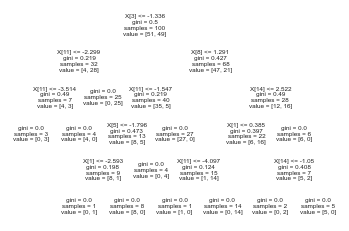

In [42]:
tree.plot_tree(clf)

In [43]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph.render("tree")

'iris.pdf'

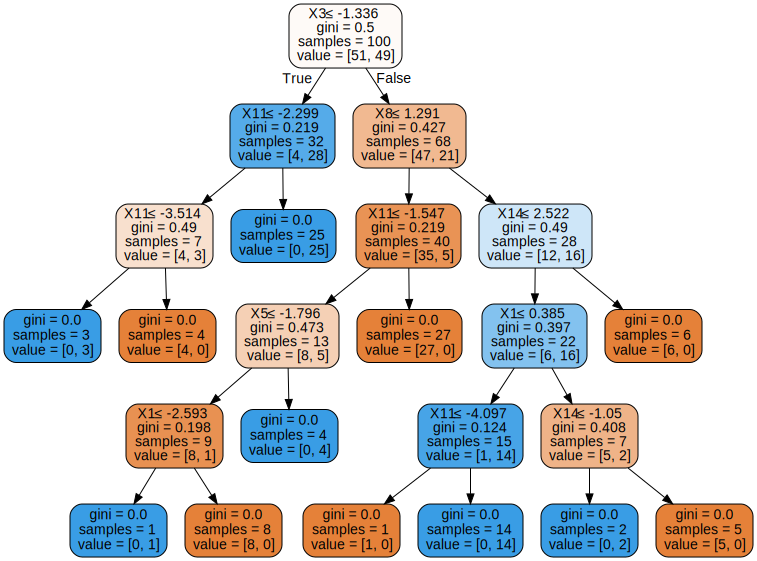

In [45]:
dot_data = tree.export_graphviz(clf, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [69]:
model=RandomForestClassifier(n_estimators=40)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [70]:
model.score(X_test,y_test)

0.7